# Statistical analysis about the iris dataset. 


In [3]:
# Import necessary packages
import pandas as pd
import numpy as np 
import seaborn as sns
import scipy.stats as scs

# Read in cleaned dataset
iris = pd.read_csv("../Data/iris_clean.csv")

iris.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Looking at intresting data for the whole dataset
# You can easily see that the sepal is bigger than the petals in both directions. 
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
# We'll look at the data but separated for the different classes/species.

species = iris["class"].unique()

for i in species:
    print(f"Specie: {i.capitalize()}")
    display(iris[iris['class'] == i].describe())



Specie: Setosa


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


Specie: Versicolor


,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Specie: Virginica


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [36]:
iris.groupby(["class"]).mean()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Just by looking at some of the values above we can see that **Virgincia** seems to be the bigger among the species, and **Setosa** the smaller,  
in every category except the *sepal_width*.
We can also tell that the standard deviation for the **Setosa** is the smaller among the 3.  

Making a scatterplot to easier see the variation between the species. 

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

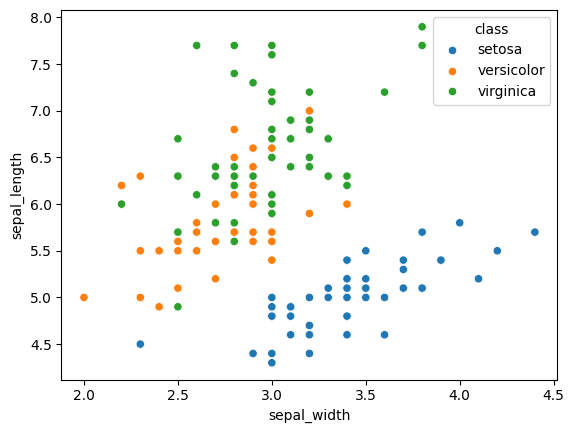

In [43]:
sns.scatterplot(data=iris, y="sepal_length", x="sepal_width", hue="class")
# sns.scatterplot(data=iris, y="petal_length", x="petal_width", hue="class")